In [502]:
# for data
import numpy as np # perform math operations (matrix math)
import pandas as pd 
from pandas import Series, DataFrame

# for plotting
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

#for the image
from IPython.display import Image

#statistics
import statsmodels.api as sm
from statsmodels.formula.api import ols

##### Assumptions 
1. Gender: Females tends to buy more than males.
2. Ages: Young people will tend to buy cheaper things and older people might tend to buy expensive things.
3. Occupation: The higher income occupation will spend more on expensive products.
4. number of city years: Newly transfered people tends to buy more compared to the people who stayed longer in the place.
5. City category: if the city has more number of purchases then we assume that it is a more developed city. 


# 1. Data Exploration
1. Access the Data 
2. Get Information about the variables
3. Showing what type of variable we have
4. Univariate analysis
    - Continuous variable
    - Categorical variable
5. Bi-variate analysis 
    - Use of anova (target ~ Features)
    - continuous vs. categorical 
    - categorical vs categorical 

In [601]:
#access the data
data = pd.read_csv('PurchaseBehaviour.csv')
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [602]:
#getting the info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [603]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


### Univariate analysis

C:\Users\rezan\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


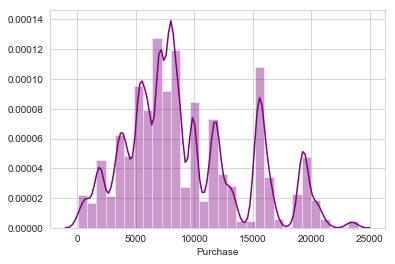

In [604]:
#continues data
sns.distplot(data['Purchase'],bins=30,color='purple')

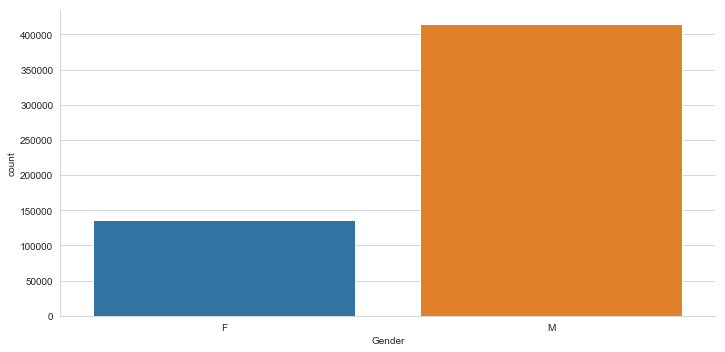

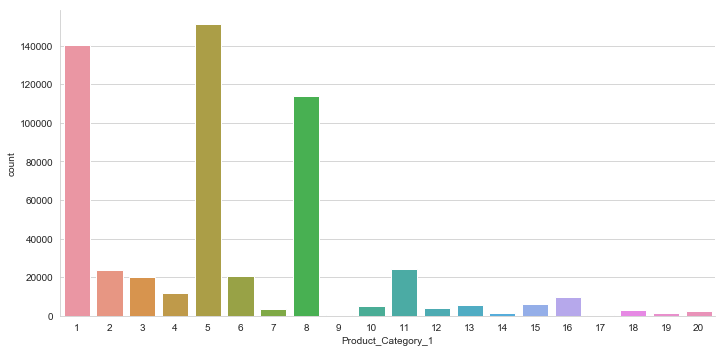

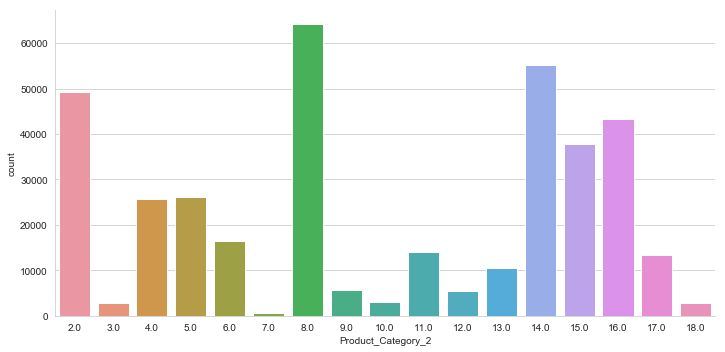

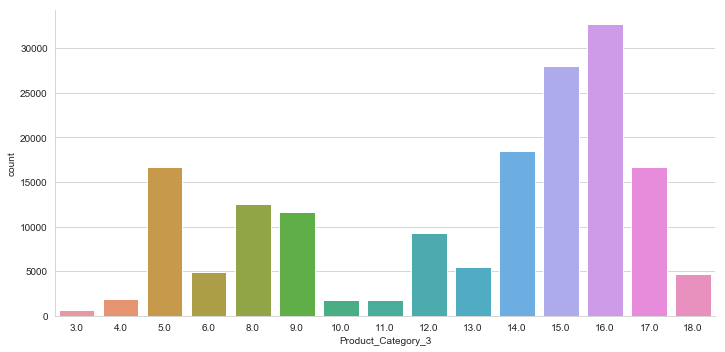

In [605]:
#Categorical variable
sns.catplot('Gender', data = data, kind = 'count', aspect = 2)
sns.catplot('Product_Category_1', data = data, kind = 'count', aspect = 2)
sns.catplot('Product_Category_2', data = data, kind = 'count', aspect = 2)
sns.catplot('Product_Category_3', data = data, kind = 'count', aspect = 2)

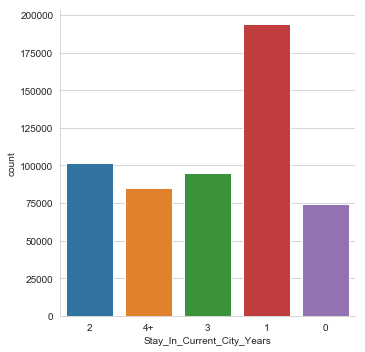

In [606]:
sns.catplot(x ='Stay_In_Current_City_Years', data = data, kind = 'count' )

### Bi-variate Analysis

1. This chart shows the amount of purchases in every age group.

C:\Users\rezan\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


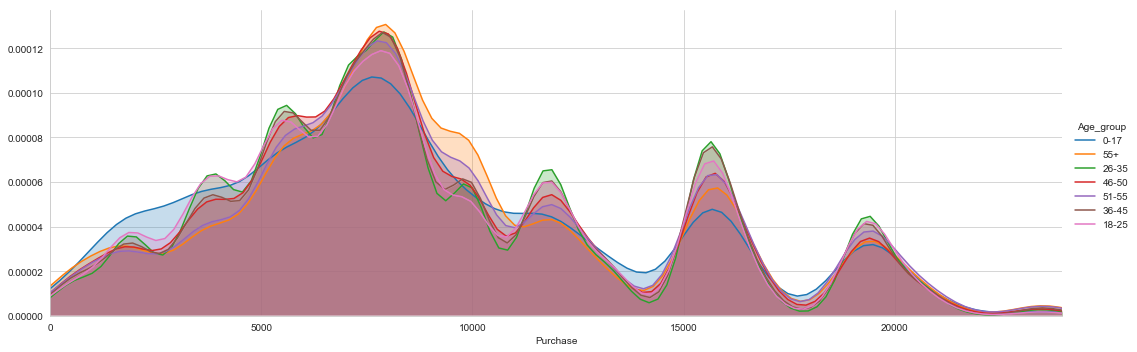

In [607]:
#Comparison between the purchase by the age group.

age_group = {'0-17': '0-17', '18-25': '18-25', '26-35':'26-35', '36-45': '36-45', '46-50': '46-50',
             '36-45': '36-45', '51-55': '51-55', '55+':'55+'}
data['Age_group'] = data['Age'].map(age_group)
fig = sns.FacetGrid(data, hue = 'Age_group', aspect = 3, height = 5)
fig.map(sns.kdeplot,'Purchase',shade=True)
biggest = data['Purchase'].max()
fig.set(xlim=(0,biggest))
fig.add_legend()

 
Remarks: There is a trend in the age groups. The age group 0-17 dominate the cheap prices shown in 'blue'. 

2. This chart shows the purchases in every occupation

C:\Users\rezan\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


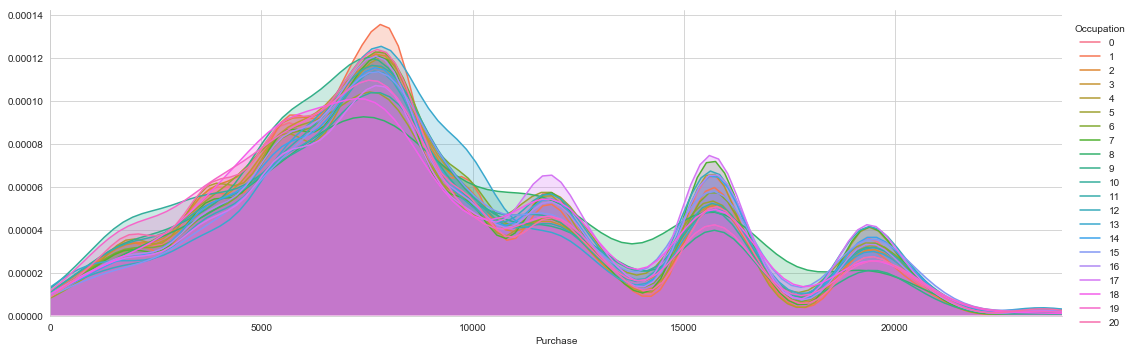

In [608]:
# Comparison between the Purchase by the occupation
fig = sns.FacetGrid(data, hue = 'Occupation', aspect = 3, height = 5)
fig.map(sns.kdeplot,'Purchase',shade=True)
biggest = data['Purchase'].max()
fig.set(xlim=(0,biggest))
fig.add_legend()

In [609]:
# getting the mean of all the Purchases from the different occupation category
purchase_per_occupation = data['Purchase'].groupby(data['Occupation'])
purchase_per_occupation.mean()

Occupation
0     9124.428588
1     8953.193270
2     8952.481683
3     9178.593088
4     9213.980251
5     9333.149298
6     9256.535691
7     9425.728223
8     9532.592497
9     8637.743761
10    8959.355375
11    9213.845848
12    9796.640239
13    9306.351061
14    9500.702772
15    9778.891163
16    9394.464349
17    9821.478236
18    9169.655844
19    8710.627231
20    8836.494905
Name: Purchase, dtype: float64

3. This chart shows the purchases in every stay in current years

C:\Users\rezan\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


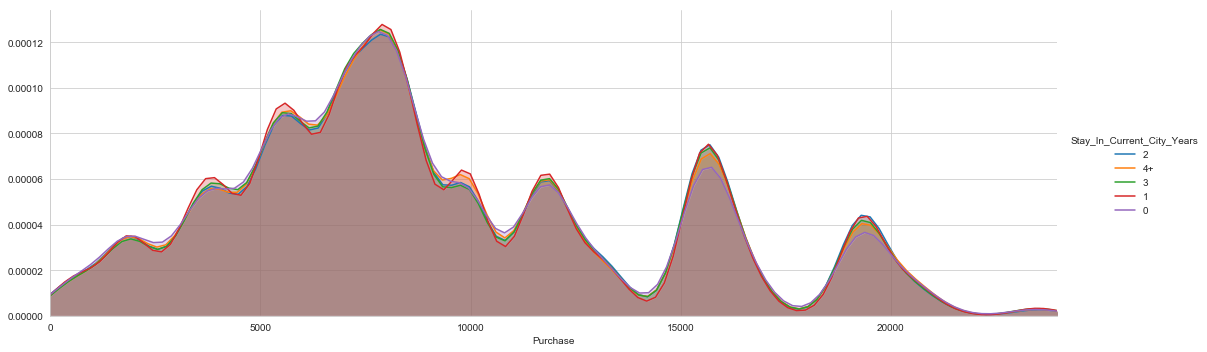

In [610]:
#Comparison between the 'purhase' and 'the stay in current years'
fig = sns.FacetGrid(data, hue = 'Stay_In_Current_City_Years', aspect = 3, height = 5)
fig.map(sns.kdeplot,'Purchase',shade=True)
biggest = data['Purchase'].max()
fig.set(xlim=(0,biggest))
fig.add_legend()

In [611]:
#numerical representation of the above graph showing their mean
purchase_per_stay = data['Purchase'].groupby(data['Stay_In_Current_City_Years'])
purchase_per_stay.mean()

Stay_In_Current_City_Years
0     9180.075123
1     9250.145923
2     9320.429810
3     9286.904119
4+    9275.598872
Name: Purchase, dtype: float64

4. This chart Shows the purchases in every city category

C:\Users\rezan\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


City_Category
A    8911.939216
B    9151.300563
C    9719.920993
Name: Purchase, dtype: float64

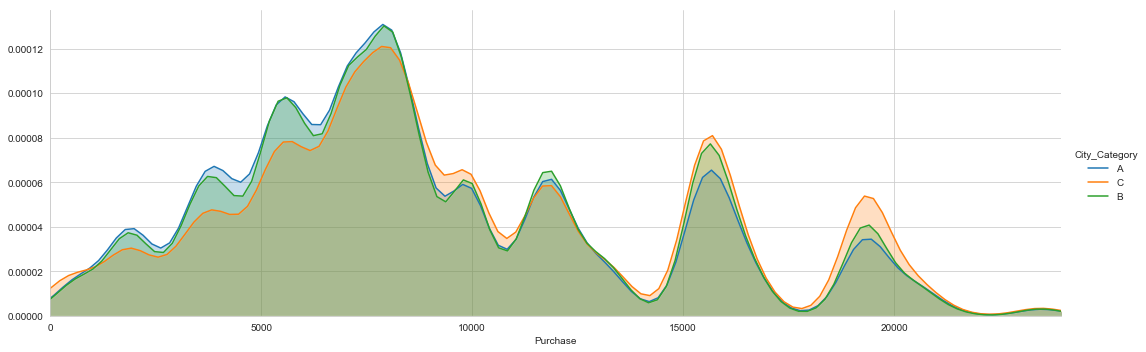

In [612]:
#Comparison between the 'purhase' and 'city category'
fig = sns.FacetGrid(data, hue = 'City_Category', aspect = 3, height = 5)
fig.map(sns.kdeplot,'Purchase',shade=True)
biggest = data['Purchase'].max()
fig.set(xlim=(0,biggest))
fig.add_legend()

city_cat = data['Purchase'].groupby(data['City_Category'])
city_cat.mean()

This chart shows the what products inside product category 1 has the most number of purchase.

Product_Category_1,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,Max_value,Sum
Gender,,,,,,,,,,,,,,,,,,,,,
F,24831,5658,6006,3639,41961,4559,943,33558,70,1162,...,1462,623,1046,2402,62,382,451,723,41961,177770
M,115547,18206,14207,8114,108972,15907,2778,80367,340,3963,...,4087,900,5244,7426,516,2743,1152,1827,115547,529806


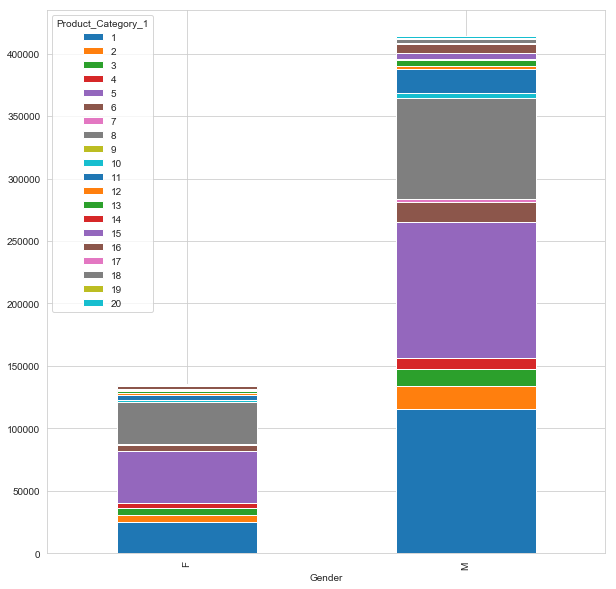

In [613]:
# Gender to product category 1
data2 = data.groupby(['Gender','Product_Category_1'])['Gender'].count().unstack('Product_Category_1')
data2.plot(kind='bar', figsize=(10,10), stacked = True )
data2['Max_value'] = data2.apply(max,axis = 1)
data2['Sum'] = data2.apply(sum, axis = 1)
data2

This chart shows the what products inside product category 2 has the most number of purchase.

Product_Category_2,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,Max_value
Gender,,,,,,,,,,,,,,,,,,
F,9199,617,7619,6155,3291,137,16529,1497,736,2754,1744,2669,19693,6432,9496,2484,478,19693
M,40018,2267,18058,20080,13175,489,47559,4196,2307,11380,3784,7862,35415,31423,33759,10836,2292,47559


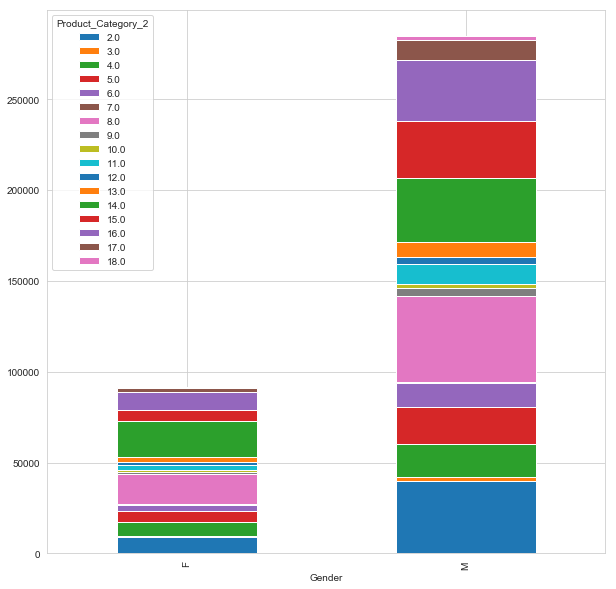

In [614]:
# Gender to Produc_category 2
data2 = data.groupby(['Gender','Product_Category_2'])['Gender'].count().unstack('Product_Category_2')
data2.plot(kind='bar', figsize=(10,10), stacked = True )
data2['Max_value'] = data2.apply(max, axis = 1)
data2

This chart shows the what products inside product category 3 has the most number of purchase.

Product_Category_3,3.0,4.0,5.0,6.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,Max_value
Gender,,,,,,,,,,,,,,,,
F,95,433,4297,828,2941,2676,414,334,2722,1229,5623,4610,6774,3738,880,6774
M,518,1442,12361,4062,9621,8903,1312,1471,6524,4230,12805,23403,25862,12964,3749,25862


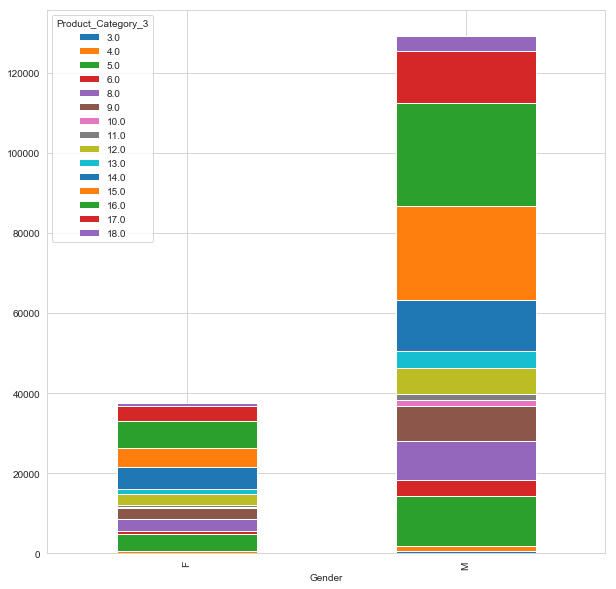

In [615]:
#Gender to Product_Category_3
data2 = data.groupby(['Gender','Product_Category_3'])['Gender'].count().unstack('Product_Category_3')
data2.plot(kind='bar', figsize=(10,10), stacked = True )
data2['Max_value'] = data2.apply(max, axis = 1)
data2

Remarks: In Product_Category_1. Product 5 is the max for females, and Product 1, is the max for males

Product_Category_1,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,Max_value,total
Age,,,,,,,,,,,,,,,,,,,,,
0-17,3585,805,1200,758,4330,399,53,2258,16,111,...,112,39,160,229,6,27,59,90,4330,19432
18-25,26962,4428,4710,2463,28522,3749,481,17911,63,603,...,756,230,1024,1598,41,339,275,469,28522,128182
26-35,58249,8928,7662,4192,61473,8485,1651,44256,154,1787,...,2096,564,2372,4118,127,1042,563,898,61473,281060
36-45,27648,4912,3854,2354,29377,3899,809,23296,107,1235,...,1250,312,1395,1955,135,702,320,506,29377,139390
46-50,10474,2105,1376,990,11971,1622,327,10656,33,520,...,551,149,602,879,95,351,149,227,11971,57672


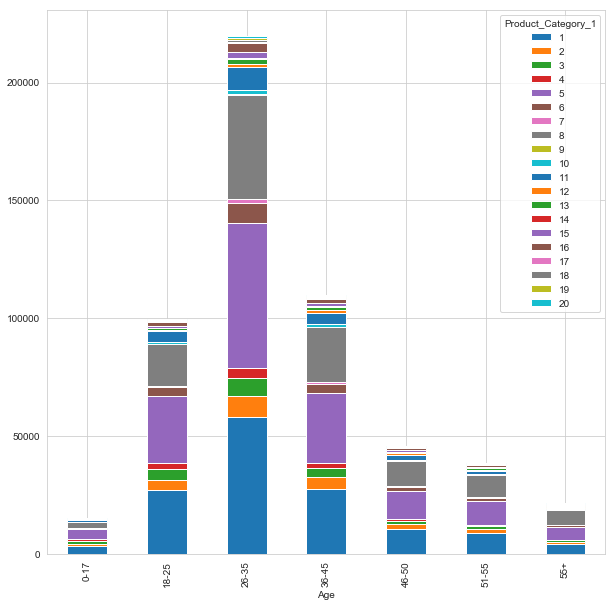

In [616]:
# Age to product category 1
data2 = data.groupby(['Age','Product_Category_1'])['Age'].count().unstack('Product_Category_1')
data2.plot(kind='bar', figsize=(10,10), stacked = True )
data2['Max_value'] = data2.apply(max, axis = 1)
data2['total'] = data2.apply(sum, axis = 1)
data2.head()

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+,Max_value
Occupation,,,,,,,,
0,2134.0,9095.0,34204.0,13393.0,4488.0,4602.0,1722.0,34204.0
1,387.0,3820.0,19080.0,9501.0,7089.0,4410.0,3139.0,19080.0
2,144.0,4364.0,12617.0,5183.0,2124.0,1344.0,812.0,12617.0
3,NaN,1860.0,8159.0,4126.0,1599.0,1094.0,812.0,NaN
4,113.0,48241.0,21829.0,1747.0,129.0,249.0,NaN,48241.0
5,NaN,1450.0,6082.0,3066.0,1187.0,377.0,15.0,NaN
6,NaN,1144.0,7216.0,4822.0,2561.0,3952.0,660.0,NaN
7,139.0,2078.0,24060.0,18762.0,6664.0,5355.0,2075.0,24060.0
8,29.0,14.0,378.0,98.0,549.0,317.0,161.0,549.0


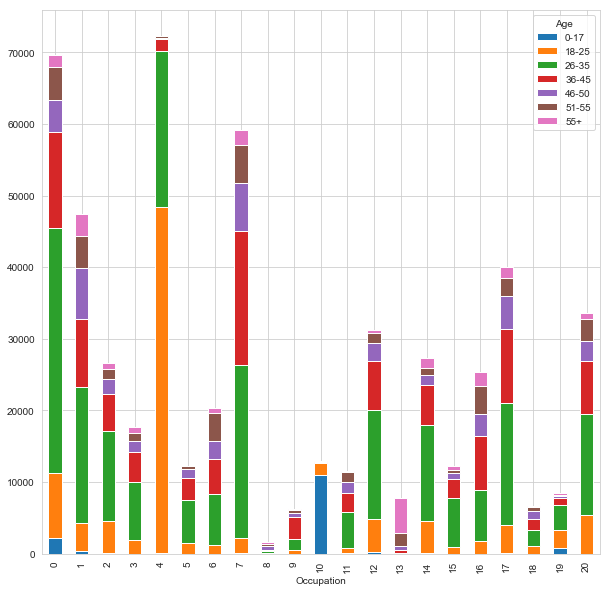

In [617]:
data3 = data.groupby(['Occupation','Age'])['Age'].count().unstack('Age')
data3.plot(kind='bar', figsize=(10,10), stacked = True )
data3['Max_value'] = data3.apply(max, axis = 1)
data3


In [618]:
# convert all to numerical data for anova analysis
gender = {'M': 1, 'F': 0}
data['Gender'] = data['Gender'].map(gender)


In [619]:
age_cat = {'0-17': 0, '55+':6, '26-35':2, '46-50': 4, '51-55':5, '36-45':3, '18-25':1}
data['Age'] = data['Age'].map(age_cat)
data['Age'] = data['Age'].astype(int)


In [620]:
#edit 'Stay_In_Current_City_Years' and removing the plus sign
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].replace(regex=r'[4+]', value=4)
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].astype(int)


In [621]:
#categorical vs continuous
# anova for categorical vs. continuous 
data_anova_result = ols('Purchase ~ Age + City_Category + Occupation + Product_Category_1 + Product_Category_2 + Product_Category_3', data=data).fit()
data_anova_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     4842.
Date:                Sat, 02 Feb 2019   Prob (F-statistic):               0.00
Time:                        19:54:05   Log-Likelihood:            -1.6448e+06
No. Observations:              166821   AIC:                         3.290e+06
Df Residuals:                  166813   BIC:                         3.290e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.206e+04     47.003    256.682      0.000     1.2e+04    1.22e+04
City_Category[T.B]   207.0225     28.792      7.190      0.000     150.590     263.455
City_Category[T.C]   822.7806     30.177     27.265      0.000     763.635     881.926
Age                  127.5930      8.601     14.835      0.000     110.735     144.451
Occupation             9.6488      1.759      5.487      0.000       6.202      13.095
Product_Category_1  -832.7316      5.100   -163.266      0.000    -842.728    -822.735
Product_Category_2    25.4941      3.379      7.545      0.000      18.871      32.117
Product_Category_3    74.7373      3.285     22.754      0.000      68.300      81.175
==============================================================================
Omnibus:                     2094.532   Durbin-Watson:                   1.833
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2242.256
Skew:                           0.254   Prob(JB):                         0.00
Kurtosis:                       3.253   Cond. No.                         80.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [622]:
# this time will be the same analysis but with the log transformation of the target variable. 
data['log_purchase'] = np.log(data['Purchase'])
data_anova_result2 = ols('log_purchase ~ Age + City_Category + Occupation + Product_Category_1 + Product_Category_2 + Product_Category_3', data=data).fit()
data_anova_result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           log_purchase   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     6677.
Date:                Sat, 02 Feb 2019   Prob (F-statistic):               0.00
Time:                        19:54:07   Log-Likelihood:            -1.3011e+05
No. Observations:              166821   AIC:                         2.602e+05
Df Residuals:                  166813   BIC:                         2.603e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              9.3225      0.005   1741.088      0.000       9.312       9.333
City_Category[T.B]     0.0201      0.003      6.137      0.000       0.014       0.027
City_Category[T.C]     0.0774      0.003     22.517      0.000       0.071       0.084
Age                    0.0176      0.001     17.928      0.000       0.016       0.019
Occupation             0.0009      0.000      4.572      0.000       0.001       0.001
Product_Category_1    -0.1124      0.001   -193.492      0.000      -0.114      -0.111
Product_Category_2     0.0038      0.000      9.931      0.000       0.003       0.005
Product_Category_3     0.0080      0.000     21.458      0.000       0.007       0.009
==============================================================================
Omnibus:                    27064.700   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            61171.753
Skew:                          -0.946   Prob(JB):                         0.00
Kurtosis:                       5.284   Cond. No.                         80.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

With the logarithmic change of the purchase in increase the r-squared from .169 to .219 however, this is still pretty small. 

In [623]:
# run a regression converting all the features into categorical using ols.

result = ols('Purchase ~ C(Age) + C(City_Category) + C(Occupation) + Marital_Status + C(Product_Category_1) +C(Stay_In_Current_City_Years) + C(Product_Category_2) + C(Product_Category_3)', data=data).fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     2341.
Date:                Sat, 02 Feb 2019   Prob (F-statistic):               0.00
Time:                        19:54:19   Log-Likelihood:            -1.6026e+06
No. Observations:              166821   AIC:                         3.205e+06
Df Residuals:                  166749   BIC:                         3.206e+06
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                           1.351e+04    170.307     79.316      0.000    1.32e+04    1.38e+04
C(Age)[T.1]                         -168.3516     86.040     -1.957      0.050    -336.989       0.286
C(Age)[T.2]                         -118.8388     86.104     -1.380      0.168    -287.600      49.922
C(Age)[T.3]                           31.3335     87.408      0.358      0.720    -139.984     202.651
C(Age)[T.4]                           93.5985     91.691      1.021      0.307     -86.114     273.311
C(Age)[T.5]                          329.0958     92.898      3.543      0.000     147.017     511.175
C(Age)[T.6]                          143.3187     99.231      1.444      0.149     -51.171     337.809
C(City_Category)[T.B]                197.9465     22.547      8.779      0.000     153.755     242.138
C(City_Category)[T.C]                737.9036     23.848     30.942      0.000     691.163     784.645
C(Occupation)[T.1]                  -156.1104     39.975     -3.905      0.000    -234.461     -77.760
C(Occupation)[T.2]                    75.1131     48.445      1.550      0.121     -19.839     170.065
C(Occupation)[T.3]                   337.5699     56.698      5.954      0.000     226.442     448.698
C(Occupation)[T.4]                   162.8128     37.367      4.357      0.000      89.574     236.052
C(Occupation)[T.5]                   155.0638     63.087      2.458      0.014      31.415     278.713
C(Occupation)[T.6]                   347.6039     53.804      6.461      0.000     242.149     453.059
C(Occupation)[T.7]                   170.2925     37.102      4.590      0.000      97.573     243.012
C(Occupation)[T.8]                  -125.3996    157.149     -0.798      0.425    -433.408     182.609
C(Occupation)[T.9]                   278.6941     87.367      3.190      0.001     107.456     449.932
C(Occupation)[T.10]                 -117.2560     91.079     -1.287      0.198    -295.768      61.256
C(Occupation)[T.11]                   92.8043     67.887      1.367      0.172     -40.253     225.862
C(Occupation)[T.12]                  336.3656     43.182      7.790      0.000     251.730     421.001
C(Occupation)[T.13]                  -35.9125     89.132     -0.403      0.687    -210.610     138.785
C(Occupation)[T.14]                  219.6692     46.620      4.712      0.000     128.295     311.043
C(Occupation)[T.15]                  436.3194     62.293      7.004      0.000     314.226     558.412
C(Occupation)[T.16]                  199.0870     49.305      4.038      0.000     102.451     295.723
C(Occupation)[T.17]                  262.2759     39.534      6.634      0.000     184.791     339.761
C(Occupation)[T.18]                 -103.4293     84.764     -1.220      0.222    -269.565      

we should adress the multicollinearity problem

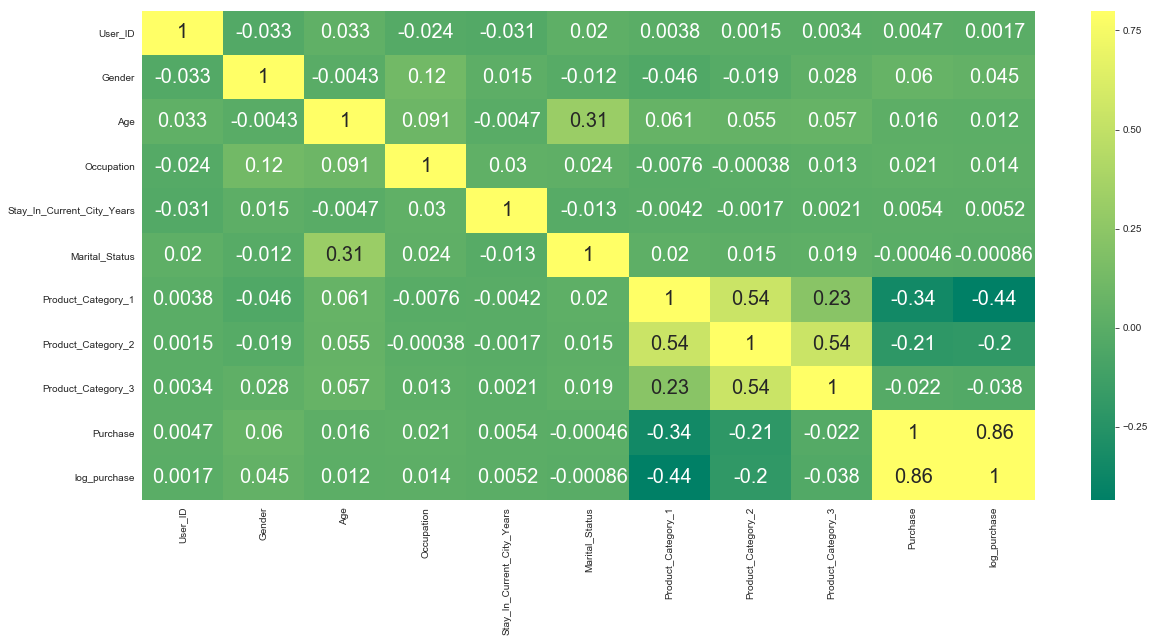

In [624]:
# getting the correlation 
corr = data.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corr, vmax=.8,annot_kws={'size': 20}, annot=True, cmap = 'summer');

# 2. Data Pre-processing 

    1. Handle missing data
    2. Use label encoder to convert categorical variables to numbers for our predictive model to understand it better. 
    3. Feature scaling
    4. Split the data into training and testing sets

In [625]:
#take a glance about missing data
data.isnull().sum()/data.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
Age_group                      0.000000
log_purchase                   0.000000
dtype: float64

We have seen that there is a 69% of missing variable in product category 3. There will be 2 options to approach this problem.

### Handling missing values 
    Option 1: Feed everything to the model and use gradient boosting and random tree regressor to handle all missing data. 
    Option 2. Fill all the missing variable with random value and delete the column with the highest percent of missing data. 

##### Option 1: Not deleting the missing data and feeding them directly to the model

In [626]:
# convert 'Stay_In_Current_City_Years' to ordinal categorical variables.
#label encoder is also enough for rule based algorithm like decision tree. 

from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

data.values[:,6] = labelencoder.fit_transform(data.values[:,6])

In [627]:
#take a look at the types again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 14 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null int64
Age                           550068 non-null int32
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null int32
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
Age_group                     550068 non-null object
log_purchase                  550068 non-null float64
dtypes: float64(3), int32(2), int64(6), object(3)
memory usage: 54.6+ MB


In [628]:
# convert to categorical then create dummies


cat_var = ['Gender', 'Age','Occupation','City_Category','Marital_Status','Product_Category_1',
           'Product_Category_2','Product_Category_3']

for var in cat_var:
    data[var] = pd.Categorical(data[var])

In [629]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 14 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null category
Age                           550068 non-null category
Occupation                    550068 non-null category
City_Category                 550068 non-null category
Stay_In_Current_City_Years    550068 non-null int32
Marital_Status                550068 non-null category
Product_Category_1            550068 non-null category
Product_Category_2            376430 non-null category
Product_Category_3            166821 non-null category
Purchase                      550068 non-null int64
Age_group                     550068 non-null object
log_purchase                  550068 non-null float64
dtypes: category(8), float64(1), int32(1), int64(2), object(2)
memory usage: 27.3+ MB


In [630]:
# get dummies out of the variables for the machine learning part.
cols = ['Gender', 'Age','Occupation','City_Category','Marital_Status','Product_Category_1',
           'Product_Category_2','Product_Category_3']
data = pd.get_dummies(data, columns = cols, drop_first = True)

In [631]:
data.head()

,User_ID,Product_ID,Stay_In_Current_City_Years,Purchase,Age_group,log_purchase,Gender_1,Age_1,Age_2,Age_3,...,Product_Category_3_9.0,Product_Category_3_10.0,Product_Category_3_11.0,Product_Category_3_12.0,Product_Category_3_13.0,Product_Category_3_14.0,Product_Category_3_15.0,Product_Category_3_16.0,Product_Category_3_17.0,Product_Category_3_18.0
0,1000001,P00069042,2,8370,0-17,9.032409,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1000001,P00248942,2,15200,0-17,9.629051,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1000001,P00087842,2,1422,0-17,7.259820,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1000001,P00085442,2,1057,0-17,6.963190,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1000002,P00285442,4,7969,55+,8.983314,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [632]:
data['cnt_User_ID'] = data.groupby('User_ID')['User_ID'].transform('count')
data['cnt_Product_ID'] = data.groupby('Product_ID')['Product_ID'].transform('count')

In [633]:
data.drop(['Age_group','User_ID','Product_ID','Purchase'], axis = 1, inplace = True )

In [634]:
data.head()

,Stay_In_Current_City_Years,log_purchase,Gender_1,Age_1,Age_2,Age_3,Age_4,Age_5,Age_6,Occupation_1,...,Product_Category_3_11.0,Product_Category_3_12.0,Product_Category_3_13.0,Product_Category_3_14.0,Product_Category_3_15.0,Product_Category_3_16.0,Product_Category_3_17.0,Product_Category_3_18.0,cnt_User_ID,cnt_Product_ID
0,2,9.032409,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,35,227
1,2,9.629051,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,35,581
2,2,7.259820,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,35,102
3,2,6.963190,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,35,341
4,4,8.983314,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,77,203


##### Scaling the features

In [691]:
# scale the dataset but maintain the original dataset because it will be fed to another model later. 
features = data.copy(deep=True)

# assign the features for testing and training for scaling

features = features.drop('log_purchase', axis = 1)
labels = data['log_purchase']

#scale

from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

features = scale.fit_transform(features)

### Split the training and testing sets

In [692]:
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state = 0)

In [693]:
print('Training Features Shape:', features_train.shape)
print('Training Labels Shape:', labels_train.shape)
print('Testing Features Shape:', features_test.shape)
print('Testing Labels Shape:', labels_test.shape)

Training Features Shape: (440054, 82)
Training Labels Shape: (440054,)
Testing Features Shape: (110014, 82)
Testing Labels Shape: (110014,)


### Cross validation

##### Data validation: 
    For regression model. The metrics are R-square, Mean square Error, and Explained variance.

In [694]:
from sklearn.metrics import  mean_squared_error, explained_variance_score, r2_score
from sklearn.model_selection import cross_val_score

def evaluation(model):
    print(model)
    
    r2 = cross_val_score(model, features_train, labels_train, cv = 10, scoring = 'r2')
    explained_variance = cross_val_score(model, features_train, labels_train, cv = 10, scoring = 'explained_variance')
    neg_mean_squared_error = cross_val_score(model, features_train, labels_train, cv = 10, scoring = 'neg_mean_squared_error')
    
    print('r2: ',r2.mean())
    print('Explained variance: ',explained_variance.mean())
    print('RMSE', np.average(np.sqrt(-neg_mean_squared_error)))
    

#### Linear regression

In [695]:
# creating a linear regression and fitting it  

from sklearn.linear_model import LinearRegression 

linearRegressor = LinearRegression()

linearRegressor.fit(features,labels)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [696]:
evaluation(linearRegressor)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
r2:  0.7551385597028413
Explained variance:  0.7551493883275857
RMSE 0.36565398103058583


#### Decision Tree regressor

In [697]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)

evaluation(dt)

DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=100,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
r2:  0.7606436686821956
Explained variance:  0.7606518813182472
RMSE 0.361520852816766
